# A Quick Intro to Pandas

Pandas is a Python package that facilitates fast, intuitive, and powerful data manipulation-- especially for relational or labeled data, i.e. CSV's with huge amounts of data.

You can find the [homepage](http://pandas.pydata.org/) here. You'll mostly be interested in the 
[documentation](http://pandas.pydata.org/pandas-docs/stable/)

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

# Just know that you have to do this to see your visualization in the notebook
%matplotlib inline

In [4]:
chip_data = pd.DataFrame.from_csv('chipotle.tsv', sep='\t')

/Users/grahampatterson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


# Understanding your data

In [5]:
chip_data.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Most ordered item?

In [11]:
grouped_chip = chip_data.groupby("item_name")
group_chip = grouped_chip.sum()
group_chip = group_chip.sort_values(by='quantity', ascending=False)
group_chip.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


### Extracting the float value of the item prices

In [22]:
dollarizer = lambda x: float(x[1:-1])
chip_data.item_price = chip_data.item_price.apply(dollarizer)

### What is the average amount spent?

In [50]:
group_chip = chip_data.groupby(by = 'order_id')
group_chip = group_chip.sum()

print("My Chipotle Data:")
print(group_chip.head())

print("\n\nAverage Order: {}".format(group_chip.mean()['item_price']))

My Chipotle Data:
          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70


Average Order: 18.81142857142869


### What about some visualizations?

(0, 215.01486242783872)

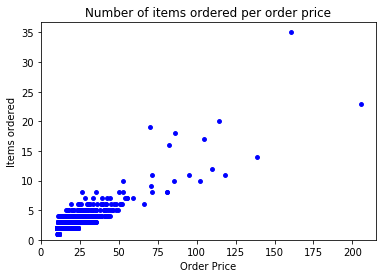

In [49]:
# groupby the orders and sum
orders = chip_data.groupby('order_id').sum()

# creates the scatterplot
plt.scatter(x = orders.item_price, y = orders.quantity, s = 15, c = 'blue')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.xlim(0)

Want to do more pandas exercises? Check out [this](https://github.com/guipsamora/pandas_exercises). Navigate to a section that you find interesting, or just start from the beginning. You can download the notebooks and work on them yourself!